In [1]:
import os
# –û—Ç–∫–ª—é—á–∞–µ—Ç –≤—Å–µ –ª–æ–≥–∏ TensorFlow (0 - –≤—Å–µ, 1 - –ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏—è, 2 - –æ—à–∏–±–∫–∏, 3 - –∫—Ä–∏—Ç–∏—á–Ω—ã–µ –æ—à–∏–±–∫–∏)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [172]:
from sklearn import datasets
import pandas as pd
import numpy as np
from typing import List, Union
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, IsolationForest
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
import time
from gower import gower_matrix
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from collections import Counter
from scipy.spatial.distance import pdist, squareform
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import OneClassSVM
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import torch
from torch.utils.data import Dataset, DataLoader
import time  
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from dotenv import load_dotenv
import neptune
import optuna
import time  
from datetime import datetime
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, r2_score, mean_squared_error, make_scorer
import shap

# 1. –ò–∑—É—á–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç. –£–¥–∞–ª—è–µ–º –∏–ª–∏ –∑–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏/NAN.

In [3]:
loan = pd.read_csv('content/loan_data.csv')

In [4]:
loan

person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
1            21.0        female      High School        12282.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
...           ...           ...              ...            ...   
44995        27.0          male        Associate        47971.0   
44996        37.0        female        Associate        65800.0   
44997        33.0          male        Associate        56942.0   
44998        29.0          male         Bachelor        33164.0   
44999        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1                   0                   OWN     1000.0          EDUCATION   
2                   3              MORTGAGE     5500.0            MEDICAL   
3                   0                  RENT    35000.0            MEDICAL   
4                   1                  RENT    35000.0            MEDICAL   
...               ...                   ...        ...                ...   
44995               6                  RENT    15000.0            MEDICAL   
44996              17                  RENT     9000.0    HOMEIMPROVEMENT   
44997               7                  RENT     2771.0  DEBTCONSOLIDATION   
44998               4                  RENT    12000.0          EDUCATION   
44999               1                  RENT     6665.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                         3.0   
1              11.14                 0.08                         2.0   
2              12.87                 0.44                         3.0   
3              15.23                 0.44                         2.0   
4              14.27                 0.53                         4.0   
...              ...                  ...                         ...   
44995          15.66                 0.31                         3.0   
44996          14.07                 0.14                        11.0   
44997          10.02                 0.05                        10.0   
44998          13.23                 0.36                         6.0   
44999          17.05                 0.13                         3.0   

       credit_score previous_loan_defaults_on_file  loan_status  
0               561                             No            1  
1               504                            Yes            0  
2               635                             No            1  
3               675                             No            1  
4               586                             No            1  
...             ...                            ...          ...  
44995           645                             No            1  
44996           621                             No            1  
44997           668                             No            1  
44998           604                             No            1  
44999           628                             No            1  

[45000 rows x 14 columns]

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

### –ù—É–ª–µ–≤—ã—Ö/NAN –¥–∞–Ω–Ω—ã—Ö –Ω–µ—Ç. 

In [6]:
# –ö–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ (Label Encoding)
df_encoded = loan.copy()
label_encoders = {}

categorical_columns = df_encoded.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le


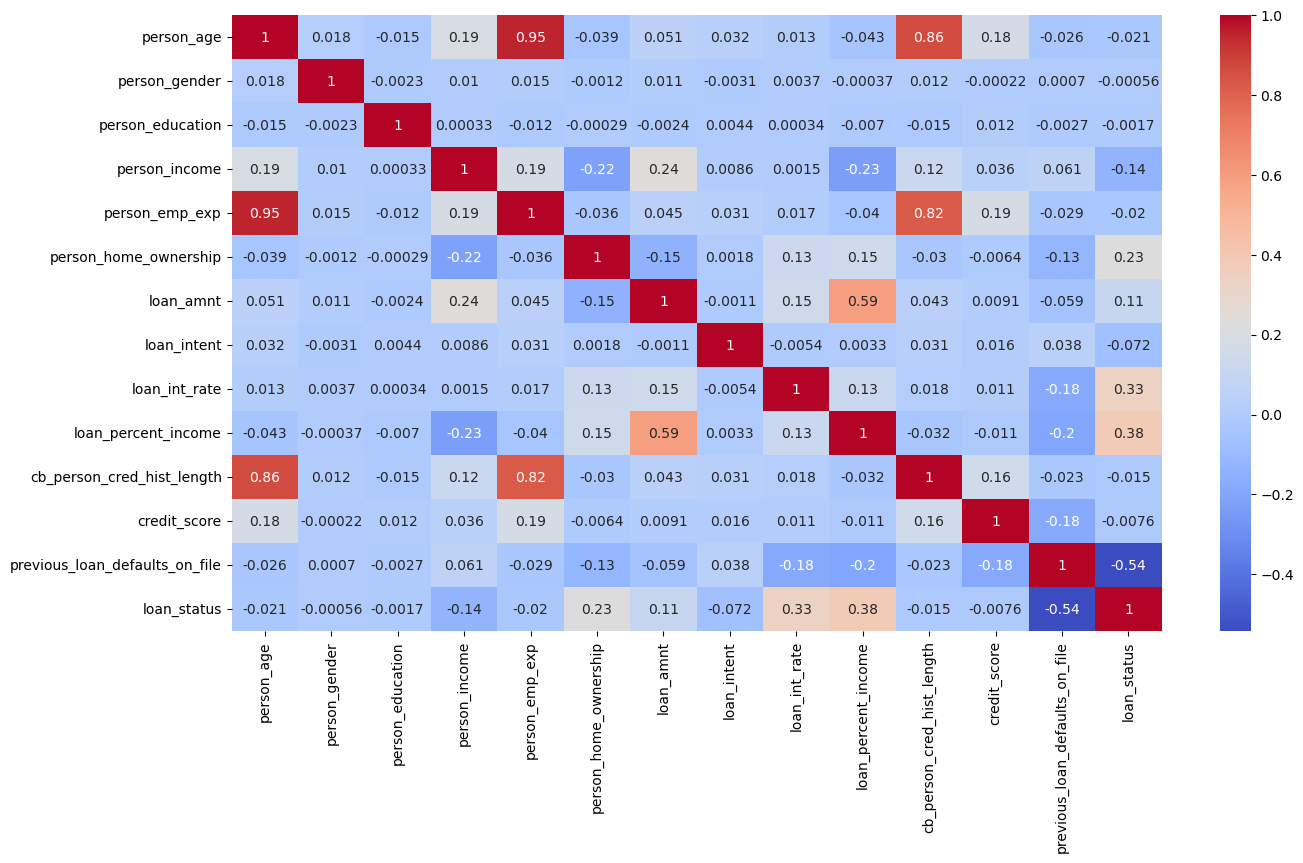

In [7]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.show()

### –¢.–∫ —ç—Ç–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è —Ç–æ –∫–æ—Ä—Ä–µ–ª–∞—Ü–∏–æ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –Ω–µ —Å–æ—Å–±–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å–Ω—ã –∏ –ª—É—á—à–µ –∏–º–ø–æ–ª—å–∑–æ–≤–∞—Ç—å MI

### 3. –í—ã–¥–µ–ª—è–µ–º –º–∞—Ç—Ä–∏—Ü—É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é

In [8]:
# –£–±–∏—Ä–∞–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é 
X = df_encoded.drop(columns=['loan_status'])
y = df_encoded.loan_status

## 4. –ü—Ä–æ–≤–µ—Ä—è–µ–º MI

In [9]:
mi_scores = mutual_info_classif(X, y)

# –û—Ñ–æ—Ä–º–ª—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ DataFrame
mi_scores = pd.Series(mi_scores, index=df_encoded.drop(columns=['loan_status']).columns)
mi_scores = mi_scores.sort_values(ascending=False)

# –í—ã–≤–æ–¥–∏–º —Ç–æ–ø-10 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
print(mi_scores)

previous_loan_defaults_on_file    0.199852
person_income                     0.091693
loan_percent_income               0.084047
loan_int_rate                     0.070773
person_home_ownership             0.039184
loan_amnt                         0.017010
loan_intent                       0.008038
person_emp_exp                    0.003556
person_gender                     0.003010
person_age                        0.002317
person_education                  0.001591
cb_person_cred_hist_length        0.000000
credit_score                      0.000000
dtype: float64


### –ú—ã –ø–æ–ª—É—á–∏–ª–∏ —á—Ç–æ –ø—Ä–∏–∑–Ω–∞–∫–∏ credit_score, person_emp_exp, person_age, person_education - –ø–æ—á—Ç–∏ –Ω–µ –±—É–¥—É—Ç –∏–º–µ—Ç—å –≤–ª–∏—è–Ω–∏–µ –Ω–∞ –º–æ–¥–µ–ª—å –∏ –∏—Ö –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å

In [10]:
X

person_age  person_gender  person_education  person_income  \
0            22.0              0                 4        71948.0   
1            21.0              0                 3        12282.0   
2            25.0              0                 3        12438.0   
3            23.0              0                 1        79753.0   
4            24.0              1                 4        66135.0   
...           ...            ...               ...            ...   
44995        27.0              1                 0        47971.0   
44996        37.0              0                 0        65800.0   
44997        33.0              1                 0        56942.0   
44998        29.0              1                 1        33164.0   
44999        24.0              1                 3        51609.0   

       person_emp_exp  person_home_ownership  loan_amnt  loan_intent  \
0                   0                      3    35000.0            4   
1                   0                      2     1000.0            1   
2                   3                      0     5500.0            3   
3                   0                      3    35000.0            3   
4                   1                      3    35000.0            3   
...               ...                    ...        ...          ...   
44995               6                      3    15000.0            3   
44996              17                      3     9000.0            2   
44997               7                      3     2771.0            0   
44998               4                      3    12000.0            1   
44999               1                      3     6665.0            0   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                         3.0   
1              11.14                 0.08                         2.0   
2              12.87                 0.44                         3.0   
3              15.23                 0.44                         2.0   
4              14.27                 0.53                         4.0   
...              ...                  ...                         ...   
44995          15.66                 0.31                         3.0   
44996          14.07                 0.14                        11.0   
44997          10.02                 0.05                        10.0   
44998          13.23                 0.36                         6.0   
44999          17.05                 0.13                         3.0   

       credit_score  previous_loan_defaults_on_file  
0               561                               0  
1               504                               1  
2               635                               0  
3               675                               0  
4               586                               0  
...             ...                             ...  
44995           645                               0  
44996           621                               0  
44997           668                               0  
44998           604                               0  
44999           628                               0  

[45000 rows x 13 columns]

In [11]:
X = df_encoded.drop(columns=['loan_status', 'credit_score', 'person_emp_exp', 'person_age', 'person_education'])

In [12]:
X

person_gender  person_income  person_home_ownership  loan_amnt  \
0                  0        71948.0                      3    35000.0   
1                  0        12282.0                      2     1000.0   
2                  0        12438.0                      0     5500.0   
3                  0        79753.0                      3    35000.0   
4                  1        66135.0                      3    35000.0   
...              ...            ...                    ...        ...   
44995              1        47971.0                      3    15000.0   
44996              0        65800.0                      3     9000.0   
44997              1        56942.0                      3     2771.0   
44998              1        33164.0                      3    12000.0   
44999              1        51609.0                      3     6665.0   

       loan_intent  loan_int_rate  loan_percent_income  \
0                4          16.02                 0.49   
1                1          11.14                 0.08   
2                3          12.87                 0.44   
3                3          15.23                 0.44   
4                3          14.27                 0.53   
...            ...            ...                  ...   
44995            3          15.66                 0.31   
44996            2          14.07                 0.14   
44997            0          10.02                 0.05   
44998            1          13.23                 0.36   
44999            0          17.05                 0.13   

       cb_person_cred_hist_length  previous_loan_defaults_on_file  
0                             3.0                               0  
1                             2.0                               1  
2                             3.0                               0  
3                             2.0                               0  
4                             4.0                               0  
...                           ...                             ...  
44995                         3.0                               0  
44996                        11.0                               0  
44997                        10.0                               0  
44998                         6.0                               0  
44999                         3.0                               0  

[45000 rows x 9 columns]

## 5. –ü—Ä–æ–≤–µ—Ä—è–µ–º –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å —á–µ—Ä–µ–∑ VIF.

In [13]:
# –†–∞—Å—Å—á–∏—Ç–∞–µ–º VIF (–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∏–Ω—Ñ–ª—è—Ü–∏–∏ –¥–∏—Å–ø–µ—Ä—Å–∏–∏)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# –í—ã–≤–æ–¥–∏–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å VIF > 10
vif_data[vif_data["VIF"] > 10]

Empty DataFrame
Columns: [Feature, VIF]
Index: []

### –í—ã–≤–æ–¥: –ú—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–µ—Ç.

## 6. –ê–Ω–æ–º–∞–ª–∏–∏:

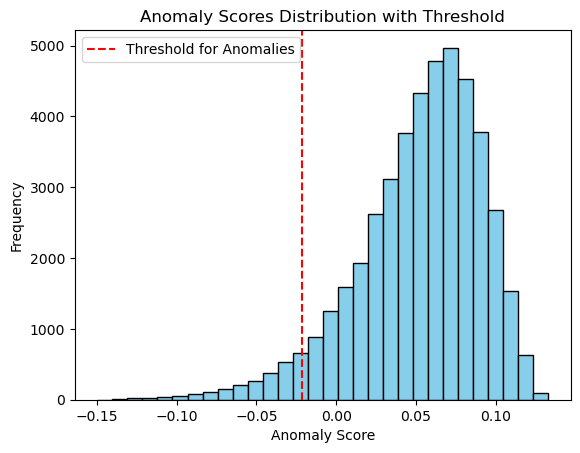

–ê–Ω–æ–º–∞–ª–∏–∏ (—Å –¥–∏–Ω–∞–º–∏—á–µ—Å–∫–∏–º –ø–æ—Ä–æ–≥–æ–º):
[0 1 1 ... 1 1 1]


In [14]:
# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–∏ Isolation Forest
iso_forest = IsolationForest(contamination=0.1)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–µ—Ç–æ–∫ (1 - –Ω–æ—Ä–º–∞–ª—å–Ω–∞—è —Ç–æ—á–∫–∞, -1 - –∞–Ω–æ–º–∞–ª—å–Ω–∞—è)
y_pred_iso = iso_forest.fit_predict(X)

# –ü–æ–ª—É—á–µ–Ω–∏–µ –∞–Ω–æ–º–∞–ª—å–Ω—ã—Ö –±–∞–ª–ª–æ–≤ (—á–µ–º –Ω–∏–∂–µ –∑–Ω–∞—á–µ–Ω–∏–µ, —Ç–µ–º –±–æ–ª–µ–µ –∞–Ω–æ–º–∞–ª—å–Ω–æ)
anomaly_scores = iso_forest.decision_function(X)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –∞–Ω–æ–º–∞–ª—å–Ω—ã—Ö –±–∞–ª–ª–æ–≤
plt.hist(anomaly_scores, bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=np.percentile(anomaly_scores, 5), color='red', linestyle='--', label='Threshold for Anomalies')
plt.title("Anomaly Scores Distribution with Threshold")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# –î–∏–Ω–∞–º–∏—á–µ—Å–∫–æ–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ—Ä–æ–≥–∞ –¥–ª—è –∞–Ω–æ–º–∞–ª–∏–π –Ω–∞ –æ—Å–Ω–æ–≤–µ 5% –Ω–∞–∏–º–µ–Ω—å—à–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π
threshold = np.percentile(anomaly_scores, 5)  # –î–ª—è –≤—ã–¥–µ–ª–µ–Ω–∏—è 5% —Å–∞–º—ã—Ö –∞–Ω–æ–º–∞–ª—å–Ω—ã—Ö —Ç–æ—á–µ–∫

# –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–∏–Ω–∞–º–∏—á–µ—Å–∫–æ–≥–æ –ø–æ—Ä–æ–≥–∞
y_pred_custom = (anomaly_scores > threshold).astype(int)  # 1 - –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ, 0 - –∞–Ω–æ–º–∞–ª—å–Ω—ã–µ

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
print("–ê–Ω–æ–º–∞–ª–∏–∏ (—Å –¥–∏–Ω–∞–º–∏—á–µ—Å–∫–∏–º –ø–æ—Ä–æ–≥–æ–º):")
print(y_pred_custom)

In [15]:
# –û—Ç–±–µ—Ä–µ–º –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ –∏–Ω–¥–µ–∫—Å—ã —á—Ç–æ–±—ã —É–¥–∞–ª–∏—Ç—å –∞–Ω–æ–º–∞–ª–∏–∏ –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞
normal_indices = np.where(y_pred_custom == 1)[0]

# –°–æ–∑–¥–∞–Ω–∏–µ –Ω–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ –±–µ–∑ –∞–Ω–æ–º–∞–ª–∏–π (–æ—Ç–±–æ—Ä —Ç–æ–ª—å–∫–æ –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö —Ç–æ—á–µ–∫)
X_without_anomalies = X.iloc[normal_indices]  # –ò—Å–ø–æ–ª—å–∑—É–µ–º iloc –¥–ª—è –ø—Ä–∞–≤–∏–ª—å–Ω–æ–≥–æ –∏–Ω–¥–µ–∫—Å–∏—Ä–æ–≤–∞–Ω–∏—è —Å—Ç—Ä–æ–∫
y_without_anomalies = y.iloc[normal_indices]  # –ï—Å–ª–∏ y - —ç—Ç–æ DataFrame –∏–ª–∏ Series

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä–∞–∑–º–µ—Ä–∞ –Ω–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞
print("–†–∞–∑–º–µ—Ä –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞:", X.shape)
print("–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ –±–µ–∑ –∞–Ω–æ–º–∞–ª–∏–π:", X_without_anomalies.shape)

–†–∞–∑–º–µ—Ä –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞: (45000, 9)
–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ –±–µ–∑ –∞–Ω–æ–º–∞–ª–∏–π: (42750, 9)


## 7.  –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è

In [16]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_without_anomalies)
df_x_scaler = pd.DataFrame(X_scaler, columns=X_without_anomalies.columns) 

## 8. –ü–æ–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏. –¢.–∫ —ç—Ç–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –±—É–¥–µ–º –ø—Ä–æ–±–æ–≤–∞—Ç—å —á–µ—Ä–µ–∑ PCA/LDA

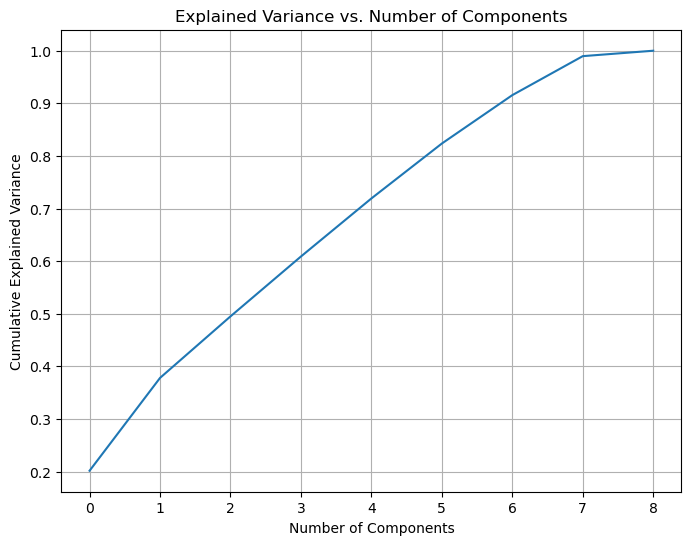

In [17]:
pca = PCA().fit(X_scaler)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

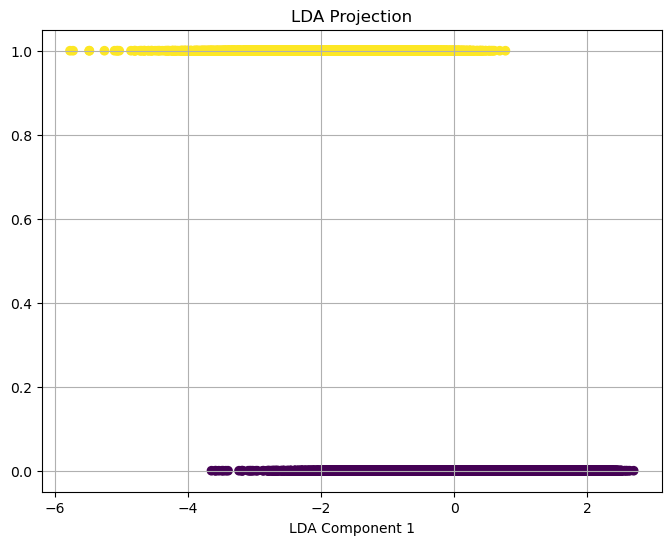

In [18]:
lda = LinearDiscriminantAnalysis(n_components=1)  # –ü–∞—Ä–∞–º–µ—Ç—Ä n_components = 1, —Ç–∞–∫ –∫–∞–∫ –∫–ª–∞—Å—Å–æ–≤ 2
X_lda = lda.fit_transform(X_scaler, y_without_anomalies)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ LDA
plt.figure(figsize=(8,6))
plt.scatter(X_lda[:, 0], y_without_anomalies, c=y_without_anomalies, cmap='viridis')
plt.xlabel('LDA Component 1')
plt.title('LDA Projection')
plt.grid(True)
plt.show()

### –í—ã–≤–æ–¥: –∏—Å—Ö–æ–¥—è –∏–∑ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –ø–æ–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –Ω–µ —Ü–µ–ª–µ—Å–æ–æ–±—Ä–∞–∑–Ω–æ. –ë—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ—Ç—å–≤–∞ –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –ø–æ—á–∏—â–µ–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç.

## 9. –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ.

In [19]:
# –†–∞–∑–±–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ: 80% –≤ train, 20% –≤ test
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y_without_anomalies, test_size=0.2, random_state=42, stratify=y_without_anomalies)

In [20]:
# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –†–∞–∑–±–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ: 80% –≤ train, 20% –≤ test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [21]:
# –ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –≤ —Ç–µ–Ω–∑–æ—Ä—ã
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # –î–ª—è –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–µ–π
print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"X_test_tensor shape: {X_test_tensor.shape}")
print(f"y_test_tensor shape: {y_test_tensor.shape}")
print(f"X_val_tensor shape: {X_val_tensor.shape}")
print(f"y_val_tensor shape: {y_val_tensor.shape}")

X_train_tensor shape: torch.Size([27360, 9])
y_train_tensor shape: torch.Size([27360, 1])
X_test_tensor shape: torch.Size([8550, 9])
y_test_tensor shape: torch.Size([8550, 1])
X_val_tensor shape: torch.Size([6840, 9])
y_val_tensor shape: torch.Size([6840, 1])


In [22]:
load_dotenv()

True

In [23]:
run = neptune.init_run(
        project=os.getenv("NEPTUNE_PROJECT"), 
        api_token=os.getenv("NEPTUNE_API_TOKEN"),
        capture_stdout=True,
        capture_stderr=True,
        capture_traceback=True,
        capture_hardware_metrics=True
    ) 

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/saatarko/financescoring/e/FIN-37


In [24]:
class LoanDataset(Dataset):
    def __init__(self, X, y=None):
        self.X = X
        self.y = y  

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if self.y is not None:
            # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –∫–∞–∫ —Ç–µ–Ω–∑–æ—Ä—ã
            return self.X[idx].float(), self.y[idx].float()
        return self.X[idx].float()

# –°–æ–∑–¥–∞—ë–º –¥–∞—Ç–∞—Å–µ—Ç—ã
train_dataset = LoanDataset(X_train_tensor, y_train_tensor)
val_dataset = LoanDataset(X_val_tensor, y_val_tensor)  
test_dataset = LoanDataset(X_test_tensor, y_test_tensor)

### –ü–æ—Å—Ç—Ä–æ–∏–º –º–æ–¥–µ–ª—å –Ω–∞ pytorch

In [108]:
# === 1. –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã ===
best_config = {
    "learning_rate": 0.001,
    "batch_size": 64,
    "dropout": 0.1,  
    "activation": "relu", 
    "optimizer": "Adam",
    "layers": 128
}

# === 2. –û–ø—Ä–µ–¥–µ–ª—è–µ–º —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ ===
device = "cuda" if torch.cuda.is_available() else "cpu"

# === 3. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö ===
train_loader_final = DataLoader(train_dataset, batch_size=best_config["batch_size"], shuffle=True)
test_loader_final = DataLoader(test_dataset, batch_size=best_config["batch_size"], shuffle=False)

# === 4. –û–±–Ω–æ–≤–ª–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å ===
class SimpleNN(nn.Module):
    def __init__(self, dropout, activation, input_dim):
        super(SimpleNN, self).__init__()

        # –í—ã–±–æ—Ä —Ñ—É–Ω–∫—Ü–∏–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞
        if activation == "relu":
            self.activation1 = nn.ReLU()
            self.activation2 = nn.ReLU()
        elif activation == "tanh":
            self.activation1 = nn.Tanh()
            self.activation2 = nn.Tanh()
        else:
            raise ValueError("Unsupported activation function")

        self.layer1 = nn.Linear(input_dim, 64)
        self.dropout1 = nn.Dropout(dropout)

        self.layer2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(dropout)

        self.output = nn.Linear(32, 1)  # –í—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π –±–µ–∑ —Å–∏–≥–º–æ–∏–¥—ã

    def forward(self, x):
        x = self.activation1(self.layer1(x))
        x = self.dropout1(x)
        x = self.activation2(self.layer2(x))
        x = self.dropout2(x)
        x = self.output(x)  # –õ–∏–Ω–µ–π–Ω—ã–π –≤—ã—Ö–æ–¥ –±–µ–∑ —Å–∏–≥–º–æ–∏–¥—ã
        return torch.sigmoid(x)  # –ü—Ä–∏–º–µ–Ω—è–µ–º —Å–∏–≥–º–æ–∏–¥—É
        
# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å
model_final = SimpleNN(
    dropout=best_config["dropout"],
    activation=best_config["activation"],
    input_dim=X_scaler.shape[1]
).to(device)

# === 5. –ù–æ–≤—ã–π loss –∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä ===
criterion = nn.BCEWithLogitsLoss()  # –ú—ã –ø—Ä–∏–º–µ–Ω—è–µ–º —Å–∏–≥–º–æ–∏–¥—É –Ω–∞ –≤—ã—Ö–æ–¥–µ –º–æ–¥–µ–ª–∏
optimizer = optim.Adam(model_final.parameters(), lr=best_config["learning_rate"])

# === 6. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ ===
epochs = 600
best_val_loss = float("inf")
patience = 30
epochs_no_improve = 0
best_model_wts = None
train_losses_final = []
val_losses_final = []

for epoch in range(epochs):
    model_final.train()
    running_loss = 0.0
    
    for inputs, labels in train_loader_final:
        inputs, labels = inputs.to(device), labels.to(device).float()  # –ú–µ—Ç–∫–∏ float
        optimizer.zero_grad()
        outputs = model_final(inputs).view(-1, 1)  # –ü—Ä–∏–≤–æ–¥–∏–º –∫ –ø—Ä–∞–≤–∏–ª—å–Ω–æ–π —Ñ–æ—Ä–º–µ
        loss = criterion(outputs, labels.view(-1, 1))  # –§–æ—Ä–º–∞—Ç–∏—Ä—É–µ–º –º–µ—Ç–∫–∏
        loss.backward()
        torch.nn.utils.clip_grad_value_(model_final.parameters(), clip_value=1.0)  # –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤
        optimizer.step()
        running_loss += loss.item()
    
    avg_train_loss = running_loss / len(train_loader_final)
    train_losses_final.append(avg_train_loss)

    # === 8. –í–∞–ª–∏–¥–∞—Ü–∏—è ===
    model_final.eval()
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in test_loader_final:
            inputs, labels = inputs.to(device), labels.to(device).float()
            outputs = model_final(inputs).view(-1, 1)
            loss = criterion(outputs, labels.view(-1, 1))
            val_loss += loss.item()
    
    avg_val_loss = val_loss / len(test_loader_final)
    val_losses_final.append(avg_val_loss)

    print(f"Epoch {epoch+1}: Train Loss={avg_train_loss:.6f}, Val Loss={avg_val_loss:.6f}")

    # –†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
        best_model_wts = model_final.state_dict()
    else:
        epochs_no_improve += 1
    
    if epochs_no_improve >= patience:
        print(f"‚èπÔ∏è Early stopping at epoch {epoch+1}")
        break

# === 10. –ó–∞–≥—Ä—É–∂–∞–µ–º –ª—É—á—à–∏–µ –≤–µ—Å–∞ –º–æ–¥–µ–ª–∏ ===
if best_model_wts is not None:
    model_final.load_state_dict(best_model_wts)
    print("‚úÖ –ó–∞–≥—Ä—É–∂–µ–Ω—ã –ª—É—á—à–∏–µ –≤–µ—Å–∞ –º–æ–¥–µ–ª–∏.")

# === 11. –°–æ—Ö—Ä–∞–Ω—è–µ–º –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å ===
model_path = "final_model.pth"
torch.save(model_final.state_dict(), model_path)
print(f"üìÅ –ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ '{model_path}'")

Epoch 1: Train Loss=0.691711, Val Loss=0.661776
Epoch 2: Train Loss=0.661104, Val Loss=0.659279
Epoch 3: Train Loss=0.658628, Val Loss=0.656931
Epoch 4: Train Loss=0.657220, Val Loss=0.655839
Epoch 5: Train Loss=0.656155, Val Loss=0.655259
Epoch 6: Train Loss=0.655592, Val Loss=0.655142
Epoch 7: Train Loss=0.655162, Val Loss=0.654000
Epoch 8: Train Loss=0.654473, Val Loss=0.653602
Epoch 9: Train Loss=0.653746, Val Loss=0.653492
Epoch 10: Train Loss=0.654302, Val Loss=0.653408
Epoch 11: Train Loss=0.653661, Val Loss=0.652841
Epoch 12: Train Loss=0.653229, Val Loss=0.652899
Epoch 13: Train Loss=0.653280, Val Loss=0.653020
Epoch 14: Train Loss=0.653440, Val Loss=0.652496
Epoch 15: Train Loss=0.653013, Val Loss=0.652835
Epoch 16: Train Loss=0.652564, Val Loss=0.652412
Epoch 17: Train Loss=0.652310, Val Loss=0.652336
Epoch 18: Train Loss=0.652667, Val Loss=0.652251
Epoch 19: Train Loss=0.652074, Val Loss=0.652289
Epoch 20: Train Loss=0.652185, Val Loss=0.652282
Epoch 21: Train Loss=0.651625

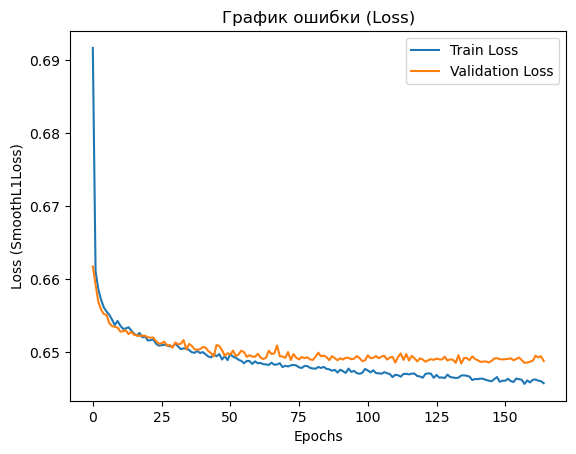

In [109]:
# –ì—Ä–∞—Ñ–∏–∫ –æ—à–∏–±–∫–∏
plt.plot(train_losses_final, label='Train Loss')
plt.plot(val_losses_final, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (SmoothL1Loss)')
plt.legend()
plt.title('–ì—Ä–∞—Ñ–∏–∫ –æ—à–∏–±–∫–∏ (Loss)')
plt.show()

Test Loss: 1.769865
Accuracy: 0.909123
Precision: 0.897341
Recall: 0.655693
F1-score: 0.757717
ROC-AUC: 0.957743


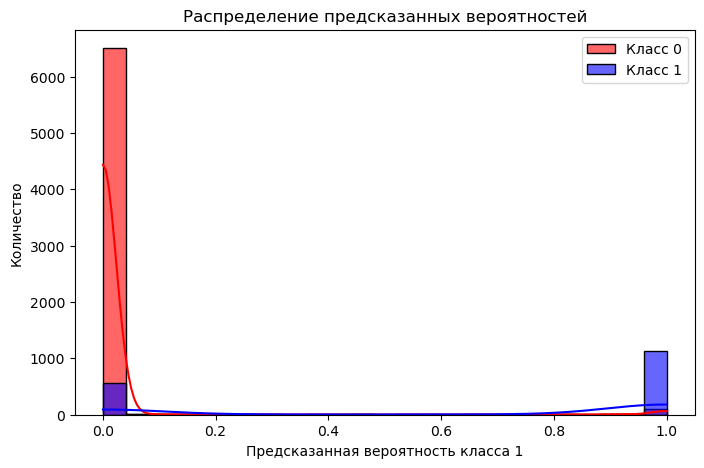

In [110]:
# –ü–µ—Ä–µ–≤–æ–¥–∏–º –º–æ–¥–µ–ª—å –≤ —Ä–µ–∂–∏–º –æ—Ü–µ–Ω–∫–∏
model_final.eval()

# –ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫
y_true = y_test_tensor.cpu().numpy().flatten()  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ numpy
y_pred_final = []

# –í–∫–ª—é—á–∞–µ–º –æ—Ç–∫–ª—é—á–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤
with torch.no_grad():
    # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
    y_pred_tensor = model_final(X_test_tensor.to(device))  
    y_pred_tensor = y_pred_tensor.cpu().numpy().reshape(-1)  # –ü—Ä–∏–≤–æ–¥–∏–º –∫ —Ñ–æ—Ä–º–µ [N]

    # –ü—Ä–∏–º–µ–Ω—è–µ–º –ø–æ—Ä–æ–≥ 0.5 –¥–ª—è –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
    y_pred_binary = (y_pred_tensor >= 0.5).astype(int)
    
    # –í—ã—á–∏—Å–ª—è–µ–º —Ç–µ—Å—Ç–æ–≤—É—é –ø–æ—Ç–µ—Ä—é
    criterion = nn.BCELoss()  
    loss = criterion(torch.tensor(y_pred_tensor, dtype=torch.float32), y_test_tensor.cpu().squeeze())  
    test_loss = loss.item()

# –í—ã—á–∏—Å–ª—è–µ–º –º–µ—Ç—Ä–∏–∫–∏
accuracy = accuracy_score(y_true, y_pred_binary)
precision = precision_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)
f1 = f1_score(y_true, y_pred_binary)
roc_auc = roc_auc_score(y_true, y_pred_tensor)  # –ò—Å–ø–æ–ª—å–∑—É–µ–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏, –∞ –Ω–µ –±–∏–Ω–∞—Ä–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è

# –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
print(f"Test Loss: {test_loss:.6f}")
print(f"Accuracy: {accuracy:.6f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-score: {f1:.6f}")
print(f"ROC-AUC: {roc_auc:.6f}")

plt.figure(figsize=(8, 5))
sns.histplot(y_pred_tensor[y_true == 0], bins=25, color="red", label="–ö–ª–∞—Å—Å 0", kde=True, alpha=0.6)
sns.histplot(y_pred_tensor[y_true == 1], bins=25, color="blue", label="–ö–ª–∞—Å—Å 1", kde=True, alpha=0.6)

plt.xlabel("–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∞ 1")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ")
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π")
plt.legend()
plt.show()

<Figure size 600x500 with 0 Axes>

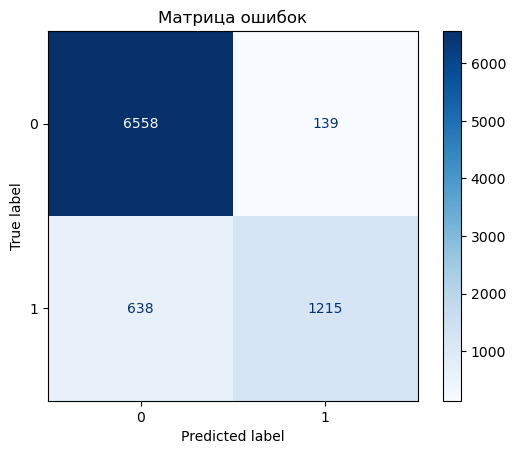

In [111]:
# –í—ã—á–∏—Å–ª—è–µ–º –º–∞—Ç—Ä–∏—Ü—É –æ—à–∏–±–æ–∫
cm = confusion_matrix(y_true, y_pred_binary)  # –ì–¥–µ y_true ‚Äî —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è, y_pred_binary ‚Äî –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è (0 –∏–ª–∏ 1)

# –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –º–∞—Ç—Ä–∏—Ü—É
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")

plt.title("–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫")
plt.show()


## 10. –ü–æ—Å–ª–µ –æ–±—É—á–µ–Ω–∏—è –∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º SHAP

ExactExplainer explainer: 8551it [02:29, 53.44it/s]                                                                                                                                                                                                                                                                 


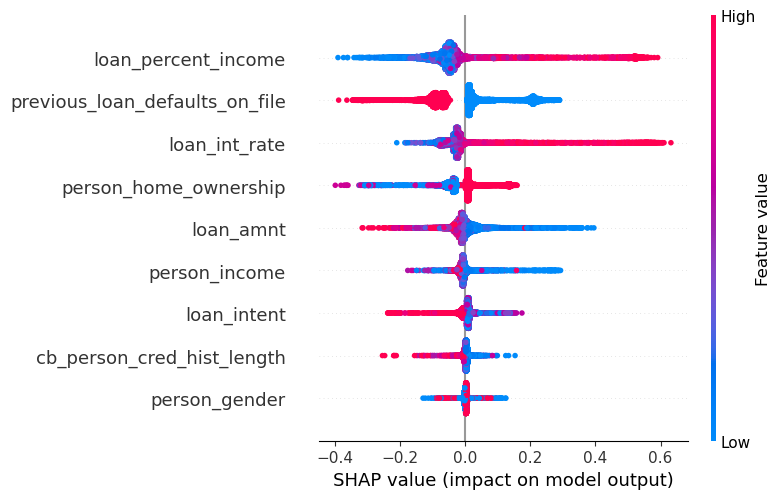

In [126]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —á–µ—Ä–µ–∑ –º–æ–¥–µ–ª—å
def model_predict(x):
    # –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ –≤—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ ‚Äî —ç—Ç–æ torch.Tensor
    x = torch.tensor(x, dtype=torch.float32)  # –ï—Å–ª–∏ x —ç—Ç–æ numpy.ndarray
    x = x.to(device)  # –ü–µ—Ä–µ–Ω–æ—Å–∏–º –Ω–∞ —Ç–æ—Ç –∂–µ –¥–µ–≤–∞–π—Å, –≥–¥–µ –º–æ–¥–µ–ª—å
    model_final.eval()  # –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ –º–æ–¥–µ–ª—å –≤ —Ä–µ–∂–∏–º–µ "–æ—Ü–µ–Ω–∫–∏"
    with torch.no_grad():
        return model_final(x).cpu().numpy()  # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –Ω–∞ CPU –∏ –∫–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –≤ numpy

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º SHAP –æ–±—ä—è—Å–Ω–∏—Ç–µ–ª—å —Å –∫–∞—Å—Ç–æ–º–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–µ–π –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
my_explainer = shap.Explainer(model_predict, X_test)

# –ü–æ–ª—É—á–∞–µ–º SHAP –∑–Ω–∞—á–µ–Ω–∏—è
shap_values = my_explainer(X_test)

# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
shap.summary_plot(shap_values, X_test, feature_names=df_x_scaler.columns)

## –ù–∞–∏–±–æ–ª–µ–µ –∑–Ω–∞—á–∏–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:
previous_loan_defaults_on_file_Yes ‚Äì –Ω–∞–ª–∏—á–∏–µ –¥–µ—Ñ–æ–ª—Ç–æ–≤ –ø–æ –ø—Ä–µ–¥—ã–¥—É—â–∏–º –∫—Ä–µ–¥–∏—Ç–∞–º —Å–∏–ª—å–Ω–æ –≤–ª–∏—è–µ—Ç –Ω–∞ –ø—Ä–æ–≥–Ω–æ–∑.
loan_percent_income ‚Äì –ø—Ä–æ—Ü–µ–Ω—Ç –∫—Ä–µ–¥–∏—Ç–∞ –æ—Ç –¥–æ—Ö–æ–¥–∞ –∑–∞–µ–º—â–∏–∫–∞ —Ç–∞–∫–∂–µ –∫—Ä–∏—Ç–∏—á–µ–Ω.
loan_int_rate ‚Äì –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–∞—è —Å—Ç–∞–≤–∫–∞ –ø–æ –∫—Ä–µ–¥–∏—Ç—É.
loan_amnt ‚Äì —Å—É–º–º–∞ –∫—Ä–µ–¥–∏—Ç–∞.

–ò–Ω—Ç—Ä–µ–ø—Ä–µ—Ç–∞—Ü–∏—è:
previous_loan_defaults_on_file_Yes: –µ—Å–ª–∏ —á–µ–ª–æ–≤–µ–∫ –∏–º–µ–ª –¥–µ—Ñ–æ–ª—Ç, —ç—Ç–æ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ–≥–æ –∏—Å—Ö–æ–¥–∞ (—Å–º–µ—â–∞–µ—Ç SHAP-–∑–Ω–∞—á–µ–Ω–∏—è –≤–ø—Ä–∞–≤–æ).
credit_score: –≤—ã—Å–æ–∫–∏–π –∫—Ä–µ–¥–∏—Ç–Ω—ã–π —Ä–µ–π—Ç–∏–Ω–≥ (–∫—Ä–∞—Å–Ω—ã–µ —Ç–æ—á–∫–∏) —Å–Ω–∏–∂–∞–µ—Ç —Ä–∏—Å–∫ (–æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ SHAP-–∑–Ω–∞—á–µ–Ω–∏—è), –∞ –Ω–∏–∑–∫–∏–π (—Å–∏–Ω–∏–µ —Ç–æ—á–∫–∏) ‚Äì –ø–æ–≤—ã—à–∞–µ—Ç.
loan_percent_income: –≤—ã—Å–æ–∫–∏–π –ø—Ä–æ—Ü–µ–Ω—Ç –∫—Ä–µ–¥–∏—Ç–∞ –æ—Ç –¥–æ—Ö–æ–¥–∞ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç —Ä–∏—Å–∫ (–±–æ–ª—å—à–∏–µ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ SHAP-–∑–Ω–∞—á–µ–Ω–∏—è).

–í—ã–≤–æ–¥:
–§–∞–∫—Ç–æ—Ä—ã, —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å —Ñ–∏–Ω–∞–Ω—Å–æ–≤–æ–π –Ω–∞–¥–µ–∂–Ω–æ—Å—Ç—å—é –∫–ª–∏–µ–Ω—Ç–∞ (–¥–µ—Ñ–æ–ª—Ç—ã, –∫—Ä–µ–¥–∏—Ç–Ω—ã–π —Ä–µ–π—Ç–∏–Ω–≥, –ø—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –¥–æ—Ö–æ–¥–∞), —è–≤–ª—è—é—Ç—Å—è –∫–ª—é—á–µ–≤—ã–º–∏ –≤ –ø—Ä–∏–Ω—è—Ç–∏–∏ —Ä–µ—à–µ–Ω–∏—è –º–æ–¥–µ–ª—å—é.
–ú–æ–¥–µ–ª—å –¥–µ–ª–∞–µ—Ç –≤—ã–≤–æ–¥—ã –ª–æ–≥–∏—á–Ω–æ: –±–æ–ª—å—à–∏–µ –∫—Ä–µ–¥–∏—Ç—ã —Å –≤—ã—Å–æ–∫–æ–π —Å—Ç–∞–≤–∫–æ–π –∏ –≤—ã—Å–æ–∫–æ–π –Ω–∞–≥—Ä—É–∑–∫–æ–π –Ω–∞ –¥–æ—Ö–æ–¥ –ø–æ–≤—ã—à–∞—é—Ç —Ä–∏—Å–∫ –Ω–µ–≤–æ–∑–≤—Ä–∞—Ç–∞.

## –î–∞—Ç–∞—Å–µ—Ç Paris Housing

## 1. –ò–∑—É—á–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç. –£–¥–∞–ª—è–µ–º –∏–ª–∏ –∑–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏/NAN.

In [127]:
paris = pd.read_csv('content/ParisHousing.csv')

In [128]:
paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

## 2.–°—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏

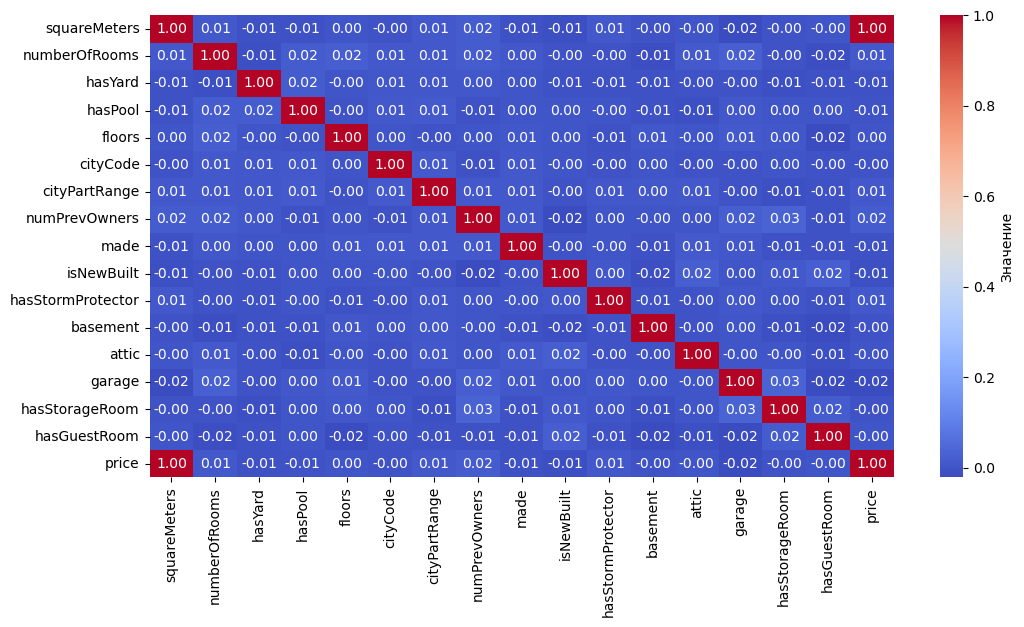

In [129]:
plt.figure(figsize=(12, 6)) 
sns.heatmap(paris.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': '–ó–Ω–∞—á–µ–Ω–∏–µ'})
plt.show()

### –ò–Ω—Ç–µ—Ä–µ—Å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ: –∏—Å–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ –Ω–∏–∑–∫–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –≤—Å–µ—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∫—Ä–æ–º–µ –º–µ—Ç—Ä–∞–∂–∞. –ü–æ–ø—Ä–æ–±—É—é –ø–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –Ω–∞–ø—Ä–∏–º–µ—Ä MI

## 3.–í—ã–¥–µ–ª—è–µ–º –º–∞—Ç—Ä–∏—Ü—É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é

In [134]:
# –£–±–∏—Ä–∞–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é 
X_paris = paris.drop(columns=['price'])
y_paris = paris['price']

## 4. –ü—Ä–æ–≤–µ—Ä—è–µ–º MI

In [135]:
mi_scores_paris = mutual_info_regression(X_paris, y_paris)

# –û—Ñ–æ—Ä–º–ª—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ DataFrame
mi_scores = pd.Series(mi_scores_paris, index=X_paris.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# –í—ã–≤–æ–¥–∏–º —Ç–æ–ø-10 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
print(mi_scores.head(10))

squareMeters     6.566407
cityCode         0.026302
numPrevOwners    0.012794
cityPartRange    0.011770
hasYard          0.007757
numberOfRooms    0.007486
floors           0.006031
attic            0.005404
isNewBuilt       0.004287
hasGuestRoom     0.002099
dtype: float64


### –ü–æ–ø—Ä–æ–±—É–µ–º —É–¥–∞–ª–∏—Ç—å hasGuestRoom

In [136]:
X_paris = paris.drop(columns=['price','hasGuestRoom'])

## 5. –ü—Ä–æ–≤–µ—Ä—è–µ–º –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å —á–µ—Ä–µ–∑ VIF.

In [137]:
# –†–∞—Å—Å—á–∏—Ç–∞–µ–º VIF (–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∏–Ω—Ñ–ª—è—Ü–∏–∏ –¥–∏—Å–ø–µ—Ä—Å–∏–∏)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_paris.columns 
vif_data["VIF"] = [variance_inflation_factor(X_paris, i) for i in range(X_paris.shape[1])]

# –í—ã–≤–æ–¥–∏–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å VIF > 10
vif_data[vif_data["VIF"] > 10]

Feature        VIF
8    made  35.080547

### –£–¥–∞—è–ª–µ–º made —Ç.–∫ VIF >10

In [138]:
X_paris = paris.drop(columns=['price','hasGuestRoom','made'])

## 6. –ê–Ω–æ–º–∞–ª–∏–∏

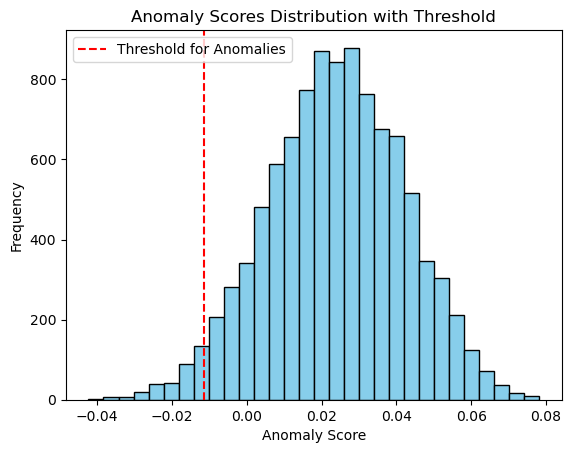

–ê–Ω–æ–º–∞–ª–∏–∏ (—Å –¥–∏–Ω–∞–º–∏—á–µ—Å–∫–∏–º –ø–æ—Ä–æ–≥–æ–º):
[1 1 1 ... 1 1 1]


In [150]:
# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–∏ Isolation Forest
iso_forest_paris = IsolationForest(contamination=0.1)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–µ—Ç–æ–∫ (1 - –Ω–æ—Ä–º–∞–ª—å–Ω–∞—è —Ç–æ—á–∫–∞, -1 - –∞–Ω–æ–º–∞–ª—å–Ω–∞—è)
y_pred_iso_paris = iso_forest_paris.fit_predict(X_paris)

# –ü–æ–ª—É—á–µ–Ω–∏–µ –∞–Ω–æ–º–∞–ª—å–Ω—ã—Ö –±–∞–ª–ª–æ–≤ (—á–µ–º –Ω–∏–∂–µ –∑–Ω–∞—á–µ–Ω–∏–µ, —Ç–µ–º –±–æ–ª–µ–µ –∞–Ω–æ–º–∞–ª—å–Ω–æ)
anomaly_scores_paris = iso_forest_paris.decision_function(X_paris)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –∞–Ω–æ–º–∞–ª—å–Ω—ã—Ö –±–∞–ª–ª–æ–≤
plt.hist(anomaly_scores_paris, bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=np.percentile(anomaly_scores_paris, 3), color='red', linestyle='--', label='Threshold for Anomalies')
plt.title("Anomaly Scores Distribution with Threshold")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# –î–∏–Ω–∞–º–∏—á–µ—Å–∫–æ–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ—Ä–æ–≥–∞ –¥–ª—è –∞–Ω–æ–º–∞–ª–∏–π –Ω–∞ –æ—Å–Ω–æ–≤–µ 3% –Ω–∞–∏–º–µ–Ω—å—à–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π
threshold_paris = np.percentile(anomaly_scores_paris, 3)  # –î–ª—è –≤—ã–¥–µ–ª–µ–Ω–∏—è 3% —Å–∞–º—ã—Ö –∞–Ω–æ–º–∞–ª—å–Ω—ã—Ö —Ç–æ—á–µ–∫

# –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–∏–Ω–∞–º–∏—á–µ—Å–∫–æ–≥–æ –ø–æ—Ä–æ–≥–∞
y_pred_custom_paris = (anomaly_scores_paris > threshold_paris).astype(int)  # 1 - –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ, 0 - –∞–Ω–æ–º–∞–ª—å–Ω—ã–µ

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
print("–ê–Ω–æ–º–∞–ª–∏–∏ (—Å –¥–∏–Ω–∞–º–∏—á–µ—Å–∫–∏–º –ø–æ—Ä–æ–≥–æ–º):")
print(y_pred_custom_paris)

In [151]:
# –û—Ç–±–µ—Ä–µ–º –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ –∏–Ω–¥–µ–∫—Å—ã —á—Ç–æ–±—ã —É–¥–∞–ª–∏—Ç—å –∞–Ω–æ–º–∞–ª–∏–∏ –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞
normal_indices_paris = np.where(y_pred_custom_paris == 1)[0]

# –°–æ–∑–¥–∞–Ω–∏–µ –Ω–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ –±–µ–∑ –∞–Ω–æ–º–∞–ª–∏–π (–æ—Ç–±–æ—Ä —Ç–æ–ª—å–∫–æ –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö —Ç–æ—á–µ–∫)
X_paris_without_anomalies = X_paris.iloc[normal_indices_paris]  
y_paris_without_anomalies = y_paris.iloc[normal_indices_paris]   

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä–∞–∑–º–µ—Ä–∞ –Ω–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞
print("–†–∞–∑–º–µ—Ä –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞:", X_paris.shape)
print("–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ –±–µ–∑ –∞–Ω–æ–º–∞–ª–∏–π:", X_paris_without_anomalies.shape)

–†–∞–∑–º–µ—Ä –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞: (10000, 14)
–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ –±–µ–∑ –∞–Ω–æ–º–∞–ª–∏–π: (9700, 14)


## 7. –ù–æ—Ä–º–∞–ª–∏–∑—É–µ–º –¥–∞–Ω–Ω—ã–µ

In [ ]:
–í –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ –¥–∞–Ω–Ω—ã–µ —É–∂–µ –ø–æ—Ö–æ–∂–∏ –Ω–∞ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–µ

## 8. –ü–æ–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ PCA

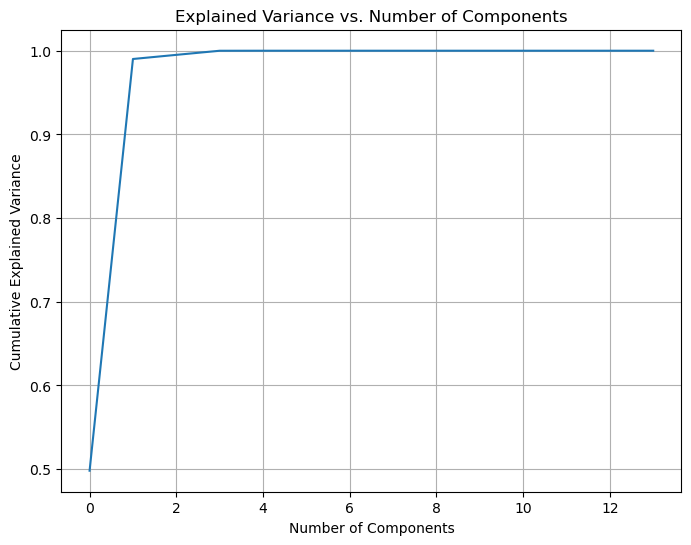

In [155]:
pca = PCA().fit(X_paris_without_anomalies)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

### –ü–æ–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ —Å–æ–º–Ω–∏—Ç–µ–ª—å–Ω–æ- –Ω–æ –º–æ–∂–Ω–æ —Ä–∞–∑–¥–µ–ª–∏—Ç—å –Ω–∞ 2 –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞

In [157]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_paris_without_anomalies)

df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])  

## 9. –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ

In [160]:
X_train_paris, X_test_paris, y_train_paris, y_test_paris = train_test_split(X_pca, y_paris_without_anomalies, test_size=0.2, random_state=42)

In [161]:
X_train_paris, X_val_paris, y_train_paris, y_val_paris = train_test_split(X_train_paris, y_train_paris, test_size=0.2, random_state=42)

In [164]:
# –ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –≤ —Ç–µ–Ω–∑–æ—Ä—ã
X_train_tensor_paris = torch.tensor(X_train_paris, dtype=torch.float32)
y_train_tensor_paris = torch.tensor(y_train_paris.values, dtype=torch.float32).unsqueeze(1)

X_test_tensor_paris = torch.tensor(X_test_paris, dtype=torch.float32)
y_test_tensor_paris = torch.tensor(y_test_paris.values, dtype=torch.float32).unsqueeze(1)

X_val_tensor_paris = torch.tensor(X_val_paris, dtype=torch.float32)
y_val_tensor_paris = torch.tensor(y_val_paris.values, dtype=torch.float32).unsqueeze(1)

In [165]:
class ParisDataset(Dataset):
    def __init__(self, X, y=None):
        self.X = X
        self.y = y  

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if self.y is not None:
            # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –∫–∞–∫ —Ç–µ–Ω–∑–æ—Ä—ã
            return self.X[idx].float(), self.y[idx].float()
        return self.X[idx].float()

# –°–æ–∑–¥–∞—ë–º –¥–∞—Ç–∞—Å–µ—Ç—ã
train_dataset_paris = ParisDataset(X_train_tensor_paris, y_train_tensor_paris)
val_dataset_paris = ParisDataset(X_val_tensor_paris, y_val_tensor_paris)  
test_dataset_paris = ParisDataset(X_test_tensor_paris, y_test_tensor_paris)

In [175]:
# === 1. –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã ===
best_config = {
    "learning_rate": 0.01,
    "batch_size": 32,
    "dropout": 0.10,  # –æ–∫—Ä—É–≥–ª—è–µ–º –¥–æ 4 –∑–Ω–∞–∫–æ–≤
    "activation": "relu",
    "num_layers": 3,
    "optimizer": "Adam",
    "layers": 250
}

# === 2. –û–ø—Ä–µ–¥–µ–ª—è–µ–º —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ ===
device = "cuda" if torch.cuda.is_available() else "cpu"

# === 3. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö ===
train_loader_paris = DataLoader(train_dataset_paris, batch_size=best_config["batch_size"], shuffle=True)
test_loader_paris = DataLoader(test_dataset_paris, batch_size=best_config["batch_size"], shuffle=False)

# === 4. –û–ø—Ä–µ–¥–µ–ª—è–µ–º –º–æ–¥–µ–ª—å ===
class SimpleNN(nn.Module):
    def __init__(self, hidden_size, dropout, activation, input_dim):
        super(SimpleNN, self).__init__()
        
        # –ü–µ—Ä–≤—ã–π —Å–ª–æ–π
        self.layer1 = nn.Linear(input_dim, hidden_size)
        self.activation1 = nn.ReLU() 
        self.dropout1 = nn.Dropout(dropout)

        # –í—Ç–æ—Ä–æ–π —Å–ª–æ–π
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.activation2 = nn.ReLU() 
        self.dropout2 = nn.Dropout(dropout)

        # –¢—Ä–µ—Ç–∏–π —Å–ª–æ–π
        self.layer3 = nn.Linear(hidden_size, 1)  # –í—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π (–¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏)
    
    def forward(self, x):
        x = self.dropout1(self.activation1(self.layer1(x)))
        x = self.dropout2(self.activation2(self.layer2(x)))
        x = self.layer3(x)
        return x

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å 
model_paris = SimpleNN(
    hidden_size=best_config["layers"],
    dropout=best_config["dropout"],
    activation=best_config["activation"],
    input_dim=X_pca.shape[1]  
).to(device)

# === 5. –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å –∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä ===
criterion = nn.SmoothL1Loss()  # Huber Loss
optimizer = optim.Adam(model_paris.parameters(), lr=best_config["learning_rate"])

# === 6. –°–æ–∑–¥–∞—ë–º –ø–∞–ø–∫—É –¥–ª—è –ª–æ–≥–æ–≤ TensorBoard ===
log_dir = f"tensorboard/{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}"
os.makedirs(log_dir, exist_ok=True)
writer = SummaryWriter(log_dir=log_dir)

# === 7. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ ===
epochs = 600
best_val_loss = float("inf")
patience = 30
epochs_no_improve = 0
best_model_wts = None
train_losses_paris = []
val_losses_paris = []

for epoch in range(epochs):
    model_paris.train()
    running_loss = 0.0
    
    for inputs, labels in train_loader_paris:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_paris(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_value_(model_paris.parameters(), clip_value=1.0)  # –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤
        optimizer.step()
        running_loss += loss.item()
    
    avg_train_loss = running_loss / len(train_loader_paris)
    train_losses_paris.append(avg_train_loss)  # –î–æ–±–∞–≤–ª—è–µ–º –≤ —Å–ø–∏—Å–æ–∫

    # === 8. –í–∞–ª–∏–¥–∞—Ü–∏—è ===
    model_paris.eval()
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in test_loader_paris:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_paris(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    avg_val_loss = val_loss / len(test_loader_paris)

    val_losses_paris.append(avg_val_loss)  # –î–æ–±–∞–≤–ª—è–µ–º –≤ —Å–ø–∏—Å–æ–∫

    print(f"Epoch {epoch+1}: Train Loss={avg_train_loss:.6f}, Val Loss={avg_val_loss:.6f}")

    # === 9. –õ–æ–≥–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –≤ TensorBoard ===
    writer.add_scalar("Loss/Train", avg_train_loss, epoch)
    writer.add_scalar("Loss/Validation", avg_val_loss, epoch)

    # –õ–æ–≥–∏—Ä—É–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã
    for name, param in model_paris.named_parameters():
        if param.grad is not None:
            writer.add_histogram(f"Gradients/{name}", param.grad, epoch)

    # –†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
        best_model_wts = model_paris.state_dict()  # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ª—É—á—à–∏–µ –≤–µ—Å–∞
    else:
        epochs_no_improve += 1
    
    if epochs_no_improve >= patience:
        print(f"‚èπÔ∏è Early stopping at epoch {epoch+1}")
        break

# === 10. –ó–∞–≥—Ä—É–∂–∞–µ–º –ª—É—á—à–∏–µ –≤–µ—Å–∞ –º–æ–¥–µ–ª–∏ ===
if best_model_wts is not None:
    model_paris.load_state_dict(best_model_wts)
    print("‚úÖ –ó–∞–≥—Ä—É–∂–µ–Ω—ã –ª—É—á—à–∏–µ –≤–µ—Å–∞ –º–æ–¥–µ–ª–∏.")

# === 11. –°–æ—Ö—Ä–∞–Ω—è–µ–º –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å –≤ –ø–∞–ø–∫—É —Å –ª–æ–≥–∞–º–∏ ===
model_path = os.path.join(log_dir, "paris_final_model.pth")
torch.save(model_paris.state_dict(), model_path)
print(f"üìÅ –ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ '{model_path}'")

# –ó–∞–∫—Ä—ã–≤–∞–µ–º TensorBoard writer
writer.close()

Epoch 1: Train Loss=1601226.488402, Val Loss=1357636.341189
Epoch 2: Train Loss=1351461.239691, Val Loss=1332609.360656
Epoch 3: Train Loss=1355587.638531, Val Loss=1331928.889344
Epoch 4: Train Loss=1361055.529961, Val Loss=1348208.840164
Epoch 5: Train Loss=1356771.370168, Val Loss=1372023.377049
Epoch 6: Train Loss=1394778.737113, Val Loss=1471697.618852
Epoch 7: Train Loss=1356020.366302, Val Loss=1344968.497951
Epoch 8: Train Loss=1365511.281894, Val Loss=1395813.739754
Epoch 9: Train Loss=1357037.164948, Val Loss=1334909.702869
Epoch 10: Train Loss=1369503.788982, Val Loss=1370488.108607
Epoch 11: Train Loss=1372658.604059, Val Loss=1365786.028689
Epoch 12: Train Loss=1361737.436211, Val Loss=1376343.151639
Epoch 13: Train Loss=1358866.971972, Val Loss=1333673.922131
Epoch 14: Train Loss=1360425.320554, Val Loss=1421161.510246
Epoch 15: Train Loss=1368741.539304, Val Loss=1341758.532787
Epoch 16: Train Loss=1363962.215851, Val Loss=1420505.144467
Epoch 17: Train Loss=1374705.3820

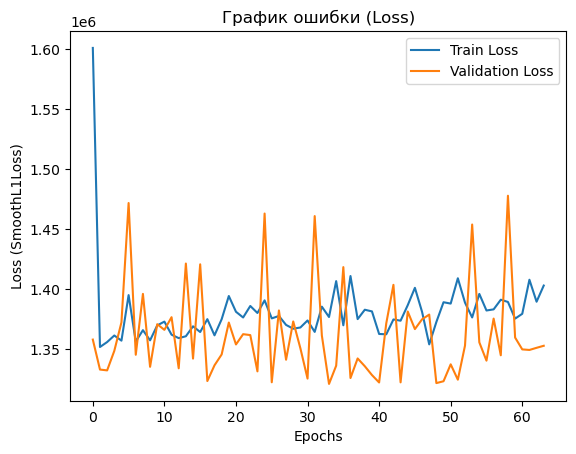

In [176]:
# –ì—Ä–∞—Ñ–∏–∫ –æ—à–∏–±–∫–∏
plt.plot(train_losses_paris, label='Train Loss')
plt.plot(val_losses_paris, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (SmoothL1Loss)')
plt.legend()
plt.title('–ì—Ä–∞—Ñ–∏–∫ –æ—à–∏–±–∫–∏ (Loss)')
plt.show()

Test Loss: 2850181611520.000000
Mean Absolute Error (MAE): 1352812.711744
R¬≤: 0.634388


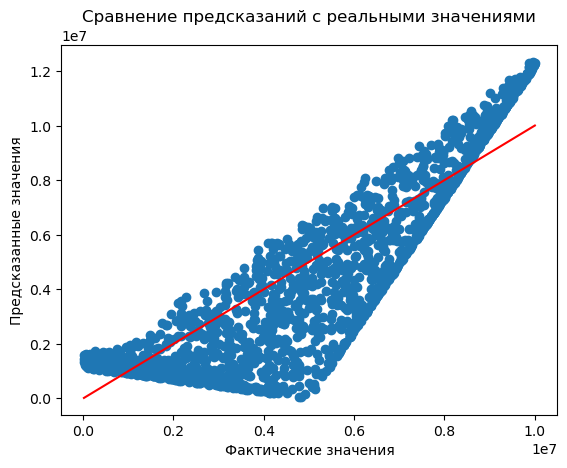

In [177]:
# –ü–µ—Ä–µ–≤–æ–¥–∏–º –º–æ–¥–µ–ª—å –≤ —Ä–µ–∂–∏–º –æ—Ü–µ–Ω–∫–∏
model_paris.eval()

# –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –æ–±—â–µ–π –ø–æ—Ç–µ—Ä–∏
test_loss = 0.0
n_samples = 0

# –ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –¥–ª—è —Ä–∞—Å—á–µ—Ç–æ–≤ MAE –∏ R¬≤
y_true_paris = torch.tensor(y_test_paris.values)  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º pandas.Series –≤ torch.Tensor
y_pred_paris = []

# –í–∫–ª—é—á–∞–µ–º –æ—Ç–∫–ª—é—á–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤
with torch.no_grad():
    # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
    y_pred_tensor = model_paris(X_test_tensor_paris.to(device))  
    y_pred_tensor = y_pred_tensor.cpu().numpy()  # –ü–µ—Ä–µ–≤–æ–¥–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤ numpy
    y_pred_paris = y_pred_tensor

    # –í—ã—á–∏—Å–ª—è–µ–º —Ç–µ—Å—Ç–æ–≤—É—é –ø–æ—Ç–µ—Ä—é
    criterion = nn.MSELoss()  # –ü–æ—Ç–µ—Ä–∏ –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
    loss = criterion(torch.tensor(y_pred_paris), y_test_tensor_paris)  # –í–∫–ª—é—á–∞–µ–º —Ä–µ–∞–ª—å–Ω–æ–µ y
    test_loss += loss.item() * y_test_tensor_paris.size(0)  # –£–º–Ω–æ–∂–∞–µ–º –Ω–∞ —Ä–∞–∑–º–µ—Ä –±–∞—Ç—á–∞
    n_samples += y_test_tensor_paris.size(0)

    # –°—Ä–µ–¥–Ω—è—è –ø–æ—Ç–µ—Ä—è
    avg_test_loss = test_loss / n_samples

# –í—ã—á–∏—Å–ª—è–µ–º MAE –∏ R¬≤
mae = mean_absolute_error(y_true_paris.numpy(), y_pred_paris)  # –ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º y_true –≤ numpy
r2 = r2_score(y_true_paris.numpy(), y_pred_paris)

# –í—ã–≤–æ–¥–∏–º —Å—Ä–µ–¥–Ω—é—é –ø–æ—Ç–µ—Ä—é, MAE –∏ R¬≤
print(f"Test Loss: {avg_test_loss:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"R¬≤: {r2:.6f}")

# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
plt.scatter(y_true_paris.numpy(), y_pred_paris)
plt.xlabel('–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏')

# –õ–∏–Ω–∏—è –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
plt.plot([min(y_true_paris.numpy()), max(y_true_paris.numpy())], [min(y_true_paris.numpy()), max(y_true_paris.numpy())], color='red') 

plt.show()


## –ü–æ–ª—É—á–∏–ª–∞—Å—å –æ—á–≥–µ—å –ø–ª–æ—Ö–∞—è –º–æ–¥–µ–ª—å –ø—Ä–ø–æ–±—É–µ–º –ø–µ—Ä–µ—Å—á–∏—Ç–∞—Ç—å –≤—Å–µ –¥–ª—è —á–∏—Å—Ç—ã—Ö –¥–∞–Ω–Ω—ã—Ö –±–µ–∑ –ø–æ–Ω–∏–∂–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏

## 10. –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º SHAP 

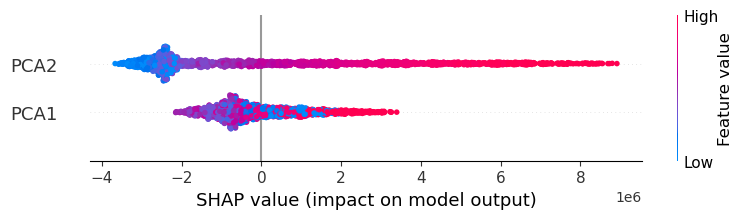

In [178]:
X_test_tensor_paris = torch.tensor(X_test_paris, dtype=torch.float32)

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —á–µ—Ä–µ–∑ –º–æ–¥–µ–ª—å
def model_predict(x):
    # –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ –≤—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ ‚Äî —ç—Ç–æ torch.Tensor
    x = torch.tensor(x, dtype=torch.float32)  # –ï—Å–ª–∏ x —ç—Ç–æ numpy.ndarray
    x = x.to(device)  # –ü–µ—Ä–µ–Ω–æ—Å–∏–º –Ω–∞ —Ç–æ—Ç –∂–µ –¥–µ–≤–∞–π—Å, –≥–¥–µ –º–æ–¥–µ–ª—å
    model_paris.eval()  # –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ –º–æ–¥–µ–ª—å –≤ —Ä–µ–∂–∏–º–µ "–æ—Ü–µ–Ω–∫–∏"
    with torch.no_grad():
        return model_paris(x).cpu().numpy()  # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –Ω–∞ CPU –∏ –∫–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –≤ numpy

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º SHAP –æ–±—ä—è—Å–Ω–∏—Ç–µ–ª—å —Å –∫–∞—Å—Ç–æ–º–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–µ–π –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
my_explainer = shap.Explainer(model_predict, X_test_paris)

# –ü–æ–ª—É—á–∞–µ–º SHAP –∑–Ω–∞—á–µ–Ω–∏—è
shap_values = my_explainer(X_test_paris)

# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
shap.summary_plot(shap_values, X_test_paris, feature_names=df_pca.columns)

## 7. –ù–æ—Ä–º–∞–ª–∏–∑—É–µ–º –¥–∞–Ω–Ω—ã–µ

### 9.1 –ü–æ–≤—Ç–æ—Ä–∏–º –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –±–µ–∑ –ø–æ–Ω–∏–∂–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏

In [193]:
X_train_paris2, X_test_paris2, y_train_paris2, y_test_paris2 = train_test_split(X_paris_without_anomalies, y_paris_without_anomalies, test_size=0.2, random_state=42)

In [194]:
X_train_paris2, X_val_paris2, y_train_paris2, y_val_paris2 = train_test_split(X_train_paris2, y_train_paris2, test_size=0.2, random_state=42)

In [221]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_paris2)
X_val_scaled = scaler.transform(X_val_paris2)
X_test_scaled = scaler.transform(X_test_paris2)
df_paris = pd.DataFrame(X_paris_without_anomalies, columns=X_paris_without_anomalies.columns)  

In [212]:
# –ö–æ–Ω–≤–µ—Ä—Ç–∞—Ü–∏—è –≤ —Ç–µ–Ω–∑–æ—Ä—ã
X_train_tensor_paris2 = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor_paris2 = torch.tensor(y_train_paris2.values, dtype=torch.float32).unsqueeze(1)

X_test_tensor_paris2 = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor_paris2 = torch.tensor(y_test_paris2.values, dtype=torch.float32).unsqueeze(1)

X_val_tensor_paris2 = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor_paris2 = torch.tensor(y_val_paris2.values, dtype=torch.float32).unsqueeze(1)

In [213]:
class ParisDataset2(Dataset):
    def __init__(self, X, y=None):
        self.X = X
        self.y = y  

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if self.y is not None:
            # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –∫–∞–∫ —Ç–µ–Ω–∑–æ—Ä—ã
            return self.X[idx].float(), self.y[idx].float()
        return self.X[idx].float()

# –°–æ–∑–¥–∞—ë–º –¥–∞—Ç–∞—Å–µ—Ç—ã
train_dataset_paris2 = ParisDataset2(X_train_tensor_paris2, y_train_tensor_paris2)
val_dataset_paris2 = ParisDataset2(X_val_tensor_paris2, y_val_tensor_paris2)  
test_dataset_paris2 = ParisDataset2(X_test_tensor_paris2, y_test_tensor_paris2)

In [215]:
# === 1. –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã ===
best_config = {
    "learning_rate": 0.01,
    "batch_size": 32,
    "dropout": 0.10,  # –æ–∫—Ä—É–≥–ª—è–µ–º –¥–æ 4 –∑–Ω–∞–∫–æ–≤
    "activation": "relu",
    "num_layers": 3,
    "optimizer": "Adam",
    "layers": 250
}

# === 2. –û–ø—Ä–µ–¥–µ–ª—è–µ–º —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ ===
device = "cuda" if torch.cuda.is_available() else "cpu"

# === 3. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö ===
train_loader_paris2 = DataLoader(train_dataset_paris2, batch_size=best_config["batch_size"], shuffle=True)
test_loader_paris2 = DataLoader(test_dataset_paris2, batch_size=best_config["batch_size"], shuffle=False)

# === 4. –û–ø—Ä–µ–¥–µ–ª—è–µ–º –º–æ–¥–µ–ª—å ===
class SimpleNN(nn.Module):
    def __init__(self, hidden_size, dropout, activation, input_dim):
        super(SimpleNN, self).__init__()
        
        # –ü–µ—Ä–≤—ã–π —Å–ª–æ–π
        self.layer1 = nn.Linear(input_dim, hidden_size)
        self.activation1 = nn.ReLU() 
        self.dropout1 = nn.Dropout(dropout)

        # –í—Ç–æ—Ä–æ–π —Å–ª–æ–π
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.activation2 = nn.ReLU() 
        self.dropout2 = nn.Dropout(dropout)

        # –¢—Ä–µ—Ç–∏–π —Å–ª–æ–π
        self.layer3 = nn.Linear(hidden_size, 1)  # –í—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π (–¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏)
    
    def forward(self, x):
        x = self.dropout1(self.activation1(self.layer1(x)))
        x = self.dropout2(self.activation2(self.layer2(x)))
        x = self.layer3(x)
        return x

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å 
model_paris2 = SimpleNN(
    hidden_size=best_config["layers"],
    dropout=best_config["dropout"],
    activation=best_config["activation"],
    input_dim=X_paris.shape[1]  
).to(device)

# === 5. –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å –∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä ===
criterion = nn.SmoothL1Loss()  # Huber Loss
optimizer = optim.Adam(model_paris2.parameters(), lr=best_config["learning_rate"])

# === 6. –°–æ–∑–¥–∞—ë–º –ø–∞–ø–∫—É –¥–ª—è –ª–æ–≥–æ–≤ TensorBoard ===
log_dir = f"tensorboard/{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}"
os.makedirs(log_dir, exist_ok=True)
writer = SummaryWriter(log_dir=log_dir)

# === 7. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ ===
epochs = 600
best_val_loss = float("inf")
patience = 30
epochs_no_improve = 0
best_model_wts = None
train_losses_paris2 = []
val_losses_paris2 = []

for epoch in range(epochs):
    model_paris2.train()
    running_loss = 0.0
    
    for inputs, labels in train_loader_paris2:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_paris2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_value_(model_paris2.parameters(), clip_value=1.0)  # –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤
        optimizer.step()
        running_loss += loss.item()
    
    avg_train_loss = running_loss / len(train_loader_paris2)
    train_losses_paris2.append(avg_train_loss)  # –î–æ–±–∞–≤–ª—è–µ–º –≤ —Å–ø–∏—Å–æ–∫

    # === 8. –í–∞–ª–∏–¥–∞—Ü–∏—è ===
    model_paris2.eval()
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in test_loader_paris2:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_paris2(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    avg_val_loss = val_loss / len(test_loader_paris2)

    val_losses_paris2.append(avg_val_loss)  # –î–æ–±–∞–≤–ª—è–µ–º –≤ —Å–ø–∏—Å–æ–∫

    print(f"Epoch {epoch+1}: Train Loss={avg_train_loss:.6f}, Val Loss={avg_val_loss:.6f}")

    # === 9. –õ–æ–≥–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –≤ TensorBoard ===
    writer.add_scalar("Loss/Train", avg_train_loss, epoch)
    writer.add_scalar("Loss/Validation", avg_val_loss, epoch)

    # –õ–æ–≥–∏—Ä—É–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã
    for name, param in model_paris2.named_parameters():
        if param.grad is not None:
            writer.add_histogram(f"Gradients/{name}", param.grad, epoch)

    # –†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
        best_model_wts = model_paris2.state_dict()  # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ª—É—á—à–∏–µ –≤–µ—Å–∞
    else:
        epochs_no_improve += 1
    
    if epochs_no_improve >= patience:
        print(f"‚èπÔ∏è Early stopping at epoch {epoch+1}")
        break

# === 10. –ó–∞–≥—Ä—É–∂–∞–µ–º –ª—É—á—à–∏–µ –≤–µ—Å–∞ –º–æ–¥–µ–ª–∏ ===
if best_model_wts is not None:
    model_paris2.load_state_dict(best_model_wts)
    print("‚úÖ –ó–∞–≥—Ä—É–∂–µ–Ω—ã –ª—É—á—à–∏–µ –≤–µ—Å–∞ –º–æ–¥–µ–ª–∏.")

# === 11. –°–æ—Ö—Ä–∞–Ω—è–µ–º –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å –≤ –ø–∞–ø–∫—É —Å –ª–æ–≥–∞–º–∏ ===
model_path = os.path.join(log_dir, "paris_final_model.pth")
torch.save(model_paris2.state_dict(), model_path)
print(f"üìÅ –ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ '{model_path}'")

# –ó–∞–∫—Ä—ã–≤–∞–µ–º TensorBoard writer
writer.close()

Epoch 1: Train Loss=4845837.659794, Val Loss=4476475.684426
Epoch 2: Train Loss=3535450.822809, Val Loss=2181637.862705
Epoch 3: Train Loss=1055405.157619, Val Loss=348432.273566
Epoch 4: Train Loss=386918.495087, Val Loss=315595.542777
Epoch 5: Train Loss=363058.330783, Val Loss=288401.674436
Epoch 6: Train Loss=347916.255477, Val Loss=272248.893186
Epoch 7: Train Loss=331267.909472, Val Loss=255201.326076
Epoch 8: Train Loss=314347.269249, Val Loss=243494.309939
Epoch 9: Train Loss=299352.507329, Val Loss=225724.764857
Epoch 10: Train Loss=287976.698373, Val Loss=208099.117572
Epoch 11: Train Loss=271408.417928, Val Loss=189143.868852
Epoch 12: Train Loss=255418.523679, Val Loss=169518.323642
Epoch 13: Train Loss=242889.130718, Val Loss=146310.279329
Epoch 14: Train Loss=228830.702481, Val Loss=134479.330046
Epoch 15: Train Loss=215590.300338, Val Loss=121819.079278
Epoch 16: Train Loss=208102.181379, Val Loss=115827.466829
Epoch 17: Train Loss=197728.767155, Val Loss=89154.035092
Ep

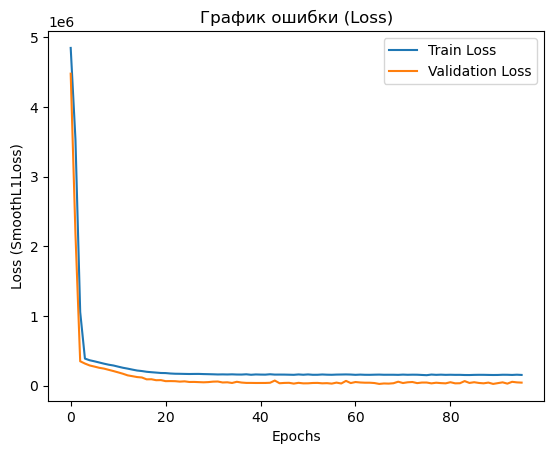

In [216]:
# –ì—Ä–∞—Ñ–∏–∫ –æ—à–∏–±–∫–∏
plt.plot(train_losses_paris2, label='Train Loss')
plt.plot(val_losses_paris2, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (SmoothL1Loss)')
plt.legend()
plt.title('–ì—Ä–∞—Ñ–∏–∫ –æ—à–∏–±–∫–∏ (Loss)')
plt.show()

Test Loss: 2655193856.000000
Mean Absolute Error (MAE): 41993.479293
R¬≤: 0.999659


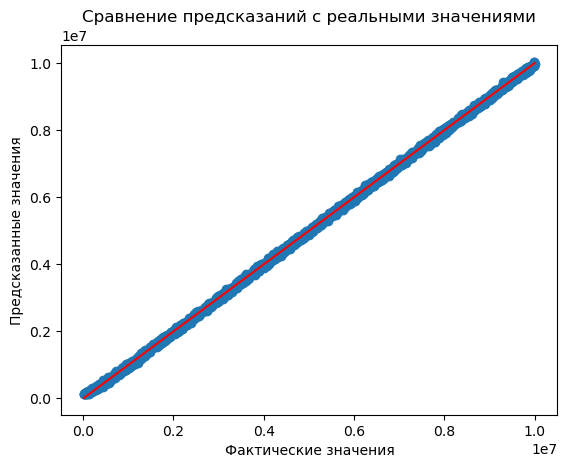

In [220]:
# –ü–µ—Ä–µ–≤–æ–¥–∏–º –º–æ–¥–µ–ª—å –≤ —Ä–µ–∂–∏–º –æ—Ü–µ–Ω–∫–∏
model_paris2.eval()

# –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –æ–±—â–µ–π –ø–æ—Ç–µ—Ä–∏
test_loss = 0.0
n_samples = 0

# –ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –¥–ª—è —Ä–∞—Å—á–µ—Ç–æ–≤ MAE –∏ R¬≤
y_true = torch.tensor(y_test_paris2.values)  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º pandas.Series –≤ torch.Tensor
y_pred_final = []

# –í–∫–ª—é—á–∞–µ–º –æ—Ç–∫–ª—é—á–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤
with torch.no_grad():
    # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
    y_pred_tensor = model_paris2(X_test_tensor_paris2.to(device))  
    y_pred_tensor = y_pred_tensor.cpu().numpy()  # –ü–µ—Ä–µ–≤–æ–¥–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤ numpy
    y_pred_final = y_pred_tensor

    # –í—ã—á–∏—Å–ª—è–µ–º —Ç–µ—Å—Ç–æ–≤—É—é –ø–æ—Ç–µ—Ä—é
    criterion = nn.MSELoss()  # –ü–æ—Ç–µ—Ä–∏ –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
    loss = criterion(torch.tensor(y_pred_final), y_test_tensor_paris2)  # –í–∫–ª—é—á–∞–µ–º —Ä–µ–∞–ª—å–Ω–æ–µ y
    test_loss += loss.item() * y_test_tensor_paris2.size(0)  # –£–º–Ω–æ–∂–∞–µ–º –Ω–∞ —Ä–∞–∑–º–µ—Ä –±–∞—Ç—á–∞
    n_samples += y_test_tensor_paris2.size(0)

    # –°—Ä–µ–¥–Ω—è—è –ø–æ—Ç–µ—Ä—è
    avg_test_loss = test_loss / n_samples

# –í—ã—á–∏—Å–ª—è–µ–º MAE –∏ R¬≤
mae = mean_absolute_error(y_true.numpy(), y_pred_final)  # –ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º y_true –≤ numpy
r2 = r2_score(y_true.numpy(), y_pred_final)

# –í—ã–≤–æ–¥–∏–º —Å—Ä–µ–¥–Ω—é—é –ø–æ—Ç–µ—Ä—é, MAE –∏ R¬≤
print(f"Test Loss: {avg_test_loss:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"R¬≤: {r2:.6f}")

# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
plt.scatter(y_true.numpy(), y_pred_final)
plt.xlabel('–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏')

# –õ–∏–Ω–∏—è –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
plt.plot([min(y_true.numpy()), max(y_true.numpy())], [min(y_true.numpy()), max(y_true.numpy())], color='red') 

plt.show()

# 10. –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º SHAP 

PermutationExplainer explainer: 1941it [00:40, 35.87it/s]                                                                                                                                                                                                                                                           


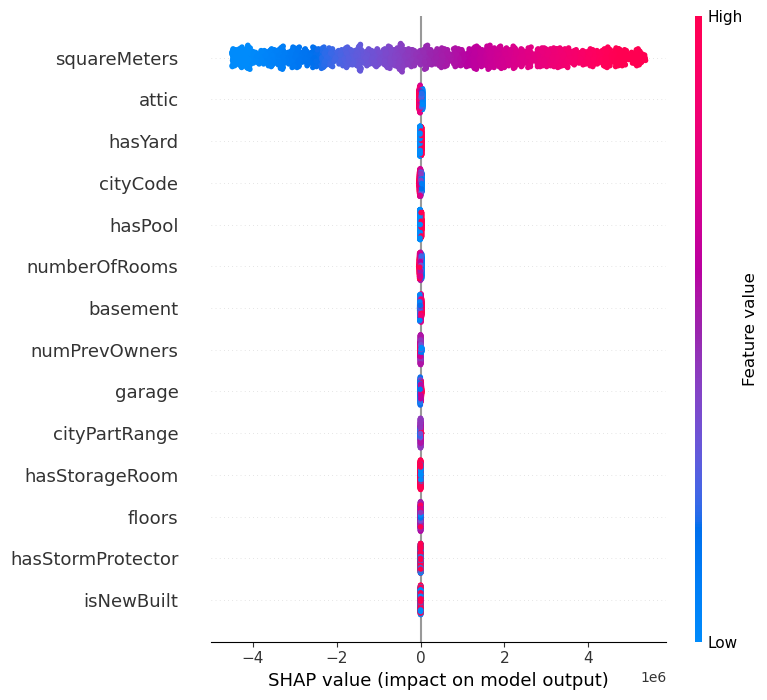

In [223]:
X_test_tensor_paris2 = torch.tensor(X_test_scaled, dtype=torch.float32)

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —á–µ—Ä–µ–∑ –º–æ–¥–µ–ª—å
def model_predict(x):
    # –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ –≤—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ ‚Äî —ç—Ç–æ torch.Tensor
    x = torch.tensor(x, dtype=torch.float32)  # –ï—Å–ª–∏ x —ç—Ç–æ numpy.ndarray
    x = x.to(device)  # –ü–µ—Ä–µ–Ω–æ—Å–∏–º –Ω–∞ —Ç–æ—Ç –∂–µ –¥–µ–≤–∞–π—Å, –≥–¥–µ –º–æ–¥–µ–ª—å
    model_paris2.eval()  # –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ –º–æ–¥–µ–ª—å –≤ —Ä–µ–∂–∏–º–µ "–æ—Ü–µ–Ω–∫–∏"
    with torch.no_grad():
        return model_paris2(x).cpu().numpy()  # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –Ω–∞ CPU –∏ –∫–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –≤ numpy

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º SHAP –æ–±—ä—è—Å–Ω–∏—Ç–µ–ª—å —Å –∫–∞—Å—Ç–æ–º–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–µ–π –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
my_explainer = shap.Explainer(model_predict, X_test_scaled)

# –ü–æ–ª—É—á–∞–µ–º SHAP –∑–Ω–∞—á–µ–Ω–∏—è
shap_values = my_explainer(X_test_scaled)

# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
shap.summary_plot(shap_values, X_test_scaled, feature_names=df_paris.columns)

### –ì—Ä–∞—Ñ–∏–∫ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ–∏—Ç MI –∏ —Ç–∞–±–ª–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏,–≤–ª–∏–µ—Ç —Ç–æ–ª—å–∫–æ –ø–ª–æ—â–∞–¥—å

–ê–ª–≥–æ—Ä–∏—Ç–º —Ä–∞–±–æ—Ç—ã —Å –¥–∞—Ç–∞—Å–µ—Ç–∞–º–∏ –≤ ML

1. –ò–∑—É—á–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç. –£–¥–∞–ª—è–µ–º –∏–ª–∏ –∑–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏/NAN.
2. –°—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏. –ï—Å–ª–∏ —É –Ω–∞—Å —Ä–µ–≥—Ä–µ—Å—Å–∏—è, —Ç–æ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å–æ —Å–ª–∞–±–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å. –í –¥—Ä—É–≥–∏—Ö —Å–ª—É—á–∞—è—Ö –º–æ–∂–Ω–æ –æ—Å—Ç–∞–≤–∏—Ç—å. –î–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–∞–∫–∂–µ –ø–æ–ª–µ–∑–Ω–æ –∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é:
- –ï—Å–ª–∏ —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è —á–∏—Å–ª–æ–≤–∞—è, –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é.
- –ï—Å–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–∞—è, —Ç–æ –ª—É—á—à–µ –æ—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å—Å—è –Ω–∞ MI (–ø.4).
  
3. –í—ã–¥–µ–ª—è–µ–º –º–∞—Ç—Ä–∏—Ü—É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é (–µ—Å–ª–∏ —ç—Ç–æ –æ–±—É—á–µ–Ω–∏–µ —Å —É—á–∏—Ç–µ–ª–µ–º).
4. –ü—Ä–æ–≤–µ—Ä—è–µ–º MI (–µ—Å–ª–∏ –æ–±—É—á–µ–Ω–∏–µ —Å —É—á–∏—Ç–µ–ª–µ–º) (mutual information –¥–ª—è —Ä–µ–≥—Ä–µ—Å–∏–∏ –º—ã –∏—Å–ø–æ–ª—å–∑—É–µ–º mutual_info_regression –∞  –¥–ª—è –∫–ª–∞—Å—Å–∏–∏—Ñ–∏–∫–∞—Ü–∏–∏ mutual_info_classif
). –ü—Ä–∏–∑–Ω–∞–∫–∏ —Å –æ–∫–æ–ª–æ–Ω—É–ª–µ–≤–æ–π (—Å–ª–∞–±–æ–π) MI —É–¥–∞–ª—è–µ–º.
5. –ü—Ä–æ–≤–µ—Ä—è–µ–º –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å —á–µ—Ä–µ–∑ VIF. –ï—Å–ª–∏ VIF >5, —Å—Ç–æ–∏—Ç –ø—Ä–∏—Å–º–æ—Ç—Ä–µ—Ç—å—Å—è –∫ –ø—Ä–∏–∑–Ω–∞–∫—É. –ï—Å–ª–∏ VIF >10 ‚Äî —É–¥–∞–ª—è–µ–º –µ–≥–æ.
6.  –ê–Ω–æ–º–∞–ª–∏–∏:
"–û–±—ä—è—Å–Ω–∏–º—ã–µ –∞–Ω–æ–º–∞–ª–∏–∏" (–Ω–∞–ø—Ä–∏–º–µ—Ä, Titanic) –Ω–µ —É–¥–∞–ª—è–µ–º.
"–®—É–º–æ–≤—ã–µ –∞–Ω–æ–º–∞–ª–∏–∏" (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Ü–µ–Ω—ã –Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã) –∏—Å—Å–ª–µ–¥—É–µ–º (Isolation Forest, Z-score, IQR). –ï—Å–ª–∏ –æ–Ω–∏ –º–µ—à–∞—é—Ç –º–æ–¥–µ–ª–∏ ‚Äî —É–¥–∞–ª—è–µ–º.
7. –ù–æ—Ä–º–∞–ª–∏–∑—É–µ–º –¥–∞–Ω–Ω—ã–µ, –µ—Å–ª–∏ —ç—Ç–æ –∏–º–µ–µ—Ç —Å–º—ã—Å–ª (–æ—Å–æ–±–µ–Ω–Ω–æ –≤–∞–∂–Ω–æ –¥–ª—è –º–æ–¥–µ–ª–µ–π, –æ—Å–Ω–æ–≤–∞–Ω–Ω—ã—Ö –Ω–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è—Ö: kNN, SVM, –Ω–µ–π—Ä–æ–Ω–∫–∏).
8. –ü–æ–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ (PCA/LDA):
 - PCA: pca = PCA().fit(X); plt.plot(np.cumsum(pca.explained_variance_ratio_)). –ï—Å–ª–∏ —Å–Ω–∏–∂–µ–Ω–∏–µ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ –∏–ª–∏ 1 –∫–æ–º–ø–æ–Ω–µ–Ω—Ç –æ–±—ä—è—Å–Ω—è–µ—Ç –ø–æ—á—Ç–∏ –≤—Å–µ, —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –Ω–µ –ø–æ–Ω–∏–∂–∞–µ–º.
- LDA: –∏—Å–ø–æ–ª—å–∑—É–µ–º —Ç–æ–ª—å–∫–æ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.
–ï—Å–ª–∏ –ø–æ–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –∞–¥–µ–∫–≤–∞—Ç–Ω–æ, –æ—Å—Ç–∞–≤–ª—è–µ–º –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã, –æ–±—ä—è—Å–Ω—è—é—â–∏–µ 95%+ –¥–∏—Å–ø–µ—Ä—Å–∏–∏.


9. –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ. –ï—Å–ª–∏ –æ–±—É—á–µ–Ω–∏–µ —Å —É—á–∏—Ç–µ–ª–µ–º:
- –†–∞–∑–±–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –∏ —Ç–µ—Å—Ç–æ–≤—ã–µ.
- –°—Ç—Ä–æ–∏–º –º–æ–¥–µ–ª—å (–Ω–∞–ø—Ä–∏–º–µ—Ä, TensorFlow/PyTorch), –ø–æ–¥–±–∏—Ä–∞–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã, –æ–±—É—á–∞–µ–º.
- –û—Ü–µ–Ω–∏–≤–∞–µ–º –º–µ—Ç—Ä–∏–∫–∏. –ï—Å–ª–∏ –º–æ–¥–µ–ª—å –Ω–∞—Å —É—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç, —Å–æ—Ö—Ä–∞–Ω—è–µ–º –µ—ë.

10. –ü–æ—Å–ª–µ –æ–±—É—á–µ–Ω–∏—è –∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º SHAP (–∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –ø–æ—Å–∂–µ —Å–æ–∑–¥–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ —Ç.–∫ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω–æ–µ –≤–ª–∏—è–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–æ —É–∂–µ –Ω–∞ –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏):
- –ü—Ä–æ–≤–µ—Ä—è–µ–º, –Ω–µ –∏–∑–º–µ–Ω–∏–ª–∏—Å—å –ª–∏ –≤–µ—Å–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.
- –û—Ü–µ–Ω–∏–≤–∞–µ–º, –Ω–µ—Ç –ª–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ –æ—Ç –º–∞–ª–æ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

11. –ï—Å–ª–∏ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è:
- –ü—Ä–æ–±—É–µ–º –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–µ—Ç–æ–¥–æ–≤ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –∏ –∏—â–µ–º —Å—Ö–æ–¥–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.
- –ï—Å–ª–∏ —É–¥–∞–ª–æ—Å—å –ø–æ–Ω–∏–∑–∏—Ç—å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –¥–æ 2 –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–æ–≤ ‚Äî —Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.
- –ï—Å–ª–∏ –±–æ–ª—å—à–µ 2 –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–æ–≤ ‚Äî –∏—Å–ø–æ–ª—å–∑—É–µ–º t-SNE –∏–ª–∏ UMAP –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏.



